#### EDA on images?

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import cv2
import os
import warnings
from skimage.io import imread
warnings.filterwarnings('ignore')

In [2]:
dfA = pd.read_csv('car_damage.csv', index_col = 0)

<AxesSubplot:xlabel='label', ylabel='count'>

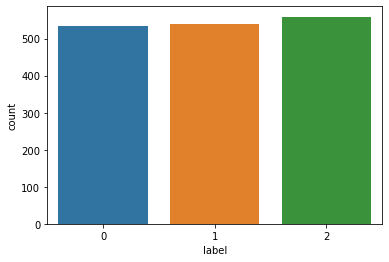

In [3]:
import seaborn as sns
sns.countplot(dfA['label'])

Equal amount of data points for each labels. 

In [4]:
i = imread('/Users/Nikki/Downloads/ML_proj_test/data3a/validation/01-minor/0001.JPEG')
i2 = imread('/Users/Nikki/Downloads/ML_proj_test/data3a/validation/02-moderate/0001.JPEG')
i3 = imread('/Users/Nikki/Downloads/ML_proj_test/data3a/validation/03-severe/0001.JPEG')

#### Tesing Eda methods on select images

In [6]:
colors = ("red", "green", "blue")

Text(0, 0.5, 'Pixel')

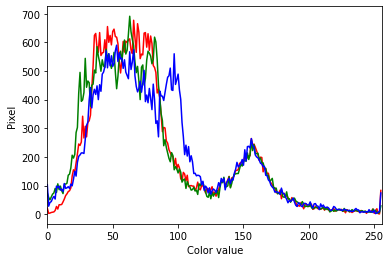

In [7]:
plt.figure()
plt.xlim([0, 256])

for ids, c in enumerate(colors):
    hist1, bins = np.histogram(
        i[:, :, ids], bins=256, range=(0, 256)
    )
    plt.plot(bins[0:-1], hist1, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixel")

Text(0, 0.5, 'Pixel')

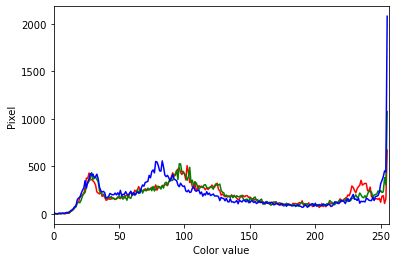

In [19]:
plt.figure()
plt.xlim([0, 256])

for ids, c in enumerate(colors):
    hist1, bins = np.histogram(
        i2[:, :, ids], bins=256, range=(0, 256)
    )
    plt.plot(bins[0:-1], hist1, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixel")

Text(0, 0.5, 'Pixel')

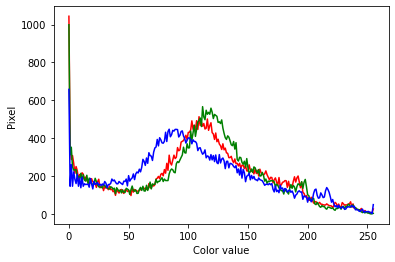

In [8]:
for ids, c in enumerate(colors):
    hist1, bins = np.histogram(
        i3[:, :, ids], bins=256, range=(0, 256)
    )
    plt.plot(bins[0:-1], hist1, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixel")

### TSNE

In [12]:
X=dfA.iloc[:,:-1]
y =dfA.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.manifold import TSNE
embedding_MDS = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_train_MDS = embedding_MDS.fit_transform(X_train)

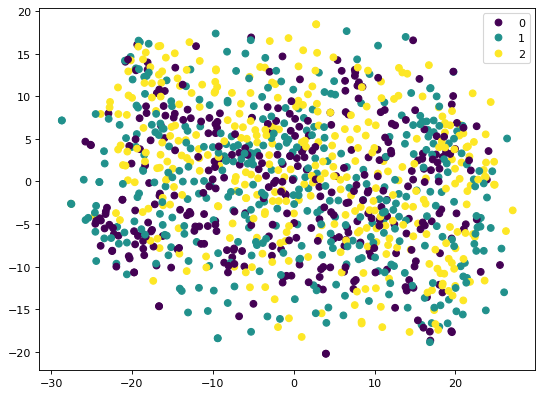

In [14]:
labels = [0, 1, 2]
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plot = plt.scatter(X_train_MDS[:,0], X_train_MDS[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels=labels)
plt.show()

TSNE on actual histograms of actual images (Picture from Rohit's notebook):

In [16]:
from IPython import display
display.Image("/Users/Nikki/Desktop/1.PNG")

#### Umap test

In [17]:
import umap.umap_ as umap
embedding_umap = umap.UMAP()
X_train_umap = embedding_umap.fit_transform(X_train)

2023-04-24 15:05:12.045908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


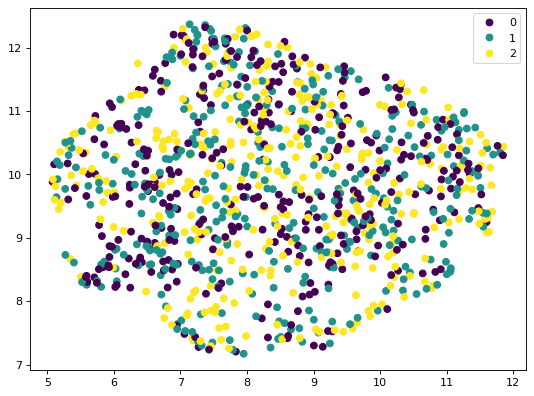

In [18]:
figure(figsize=(8, 6), dpi=80)
plot = plt.scatter(X_train_umap[:,0], X_train_umap[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels=labels)
plt.show()